<a href="https://colab.research.google.com/github/JuanLuisTrejo/Visual_Recognition_CNN_ML/blob/master/Facenet_Images_Rev6_cartoons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Face recognition Notebook May 2020**

## This notebook walks from the three phases of images recognition, using Deep learning convolutional networks in identifying the main features of a face, genrating the faces embeddings and comparing different classifications models, comparing all of them and finally optimizing the classification comparing stacked emsamble firstly and further optimizing the classification with a superlearned stacked

*   ### Face Detection. Using a Multilayer Convolutional Network (MTCNN)
*   ### Face Embeddings. Using Facenet algorhytm
*   ### Face Recognition. Comparing different classification models against stacked ensemble and Super leaner stacked ensemble 


### Facenet: The project uses the pretrained Keras Facenet model provided by Hiroki Taniai that has been trained on MS-Celeb-1M dataset. It received colored pictures with a squared shape of 160x160 pixels. FaceNet is a deep convolutional network designed by Google, Florian Schroff, in 2015 paper tittled, “Facenet: A Unified Embedding for Face Recognition and Clustering”


### MTCNN: face detection phase uses  the implementation provided by Iván de Paz Centeno in the ipazc/mtcnn project. MTCNN is a state of the art deep learning model for face detection described in the paper submitted in 2016 "Joint Face Detection and Aligment Using Multitask Cascaded Convolutional Network" 

### Superlearner stacked: It is a stacked ensemble method proposed by Van der Laan et al. that optimizes the weights of the base component learners by minimizing a loss function given cross-validated output of the learners. It has been further developed by Steve Young, Tamer Abdou and Ayse Bener in the paper dated 6th March 2018 “Deep Super Learner: A Deep Ensemble for Classification Problems” which provides a further simplicity, interpretability of results and faster convergence on small and larger dataset comparing the results with the ones obtained using Deep learning 

### The model generated runs on the  5 Celebrity Faces Dataset that MTCNN

### The full model provides an optimization in the faces recognition process from the face detection, leveraging State-of-the-art models models like MTCNN and Facenet,  being further optimized in the classification phase comparing different ML classifications models which will be compared during the model comparing different performances and concluding with the best classifier teh Stacked Super Learner model 








# 1.- Dataset management

In [1]:
#Bring the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
cd drive/My\ Drive/Datasets

/content/drive/My Drive/Datasets


In [ ]:
#This code extracts the folders included in the ZIP in which is contained the datasets
#data: All the data train plus validation
# train: Train dataset
# val: Testing dataset

import zipfile

zipfilename = "5-celebrity-faces-dataset.zip"
password = None

# open and extract all files in the zip
z = zipfile.ZipFile(zipfilename, "r")
try:
    z.extractall(pwd=password)
except:
    print('Error')
    pass
z.close()

Error


# 2.-MTCNN. Faces Detection

## Installing the Multitask Convolutional Network. This CNN detects faces in the picture

In [4]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 5.3MB/s 


In [5]:
# Confirm MTCNN has been installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

Using TensorFlow backend.


0.1.0


## Run the Multilayer Convolutional layer with an example by steps
##  1st Face detection

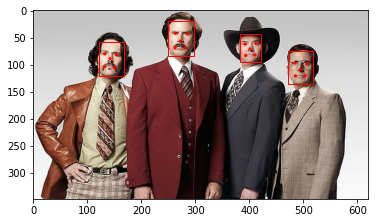

In [6]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
        # draw the dots on eyes nose ..
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'faces.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

## MTCNN Face isolation

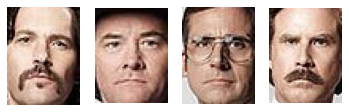

In [7]:
# extract and plot each detected face in a photograph

#by using you can seperate all the people's faces

from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
filename = 'faces.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

## MTCNN working with face detection. Plotting an example in the train dataset 160 x 160 pixeles with 3 channels

['DalaiLama0003.jpeg', 'DalaiLama0001.jpeg', 'DalaiLama0006.jpeg', 'DalaiLama0009.jpeg', 'DalaiLama0010.jpeg', 'DalaiLama0005.jpeg', 'DalaiLama0012.jpeg', 'DalaiLama0013.jpeg', 'DalaiLama0021.jpeg', 'DalaiLama0023.jpeg', 'DalaiLama0019.jpeg', 'DalaiLama0031.jpeg', 'DalaiLama0026.jpeg', 'DalaiLama0030.jpeg', 'DalaiLama0028.jpeg', 'DalaiLama0029.jpeg', 'DalaiLama0033.jpeg', 'DalaiLama0032.jpeg', 'DalaiLama0042.jpeg', 'DalaiLama0041.jpeg', 'DalaiLama0038.jpeg', 'DalaiLama0039.jpeg', 'DalaiLama0049.jpeg', 'DalaiLama0045.jpeg', 'DalaiLama0050.jpeg', 'DalaiLama0051.jpeg']
1 (160, 160, 3) DalaiLama0003.jpeg
2 (160, 160, 3) DalaiLama0001.jpeg
3 (160, 160, 3) DalaiLama0006.jpeg
4 (160, 160, 3) DalaiLama0009.jpeg
5 (160, 160, 3) DalaiLama0010.jpeg
6 (160, 160, 3) DalaiLama0005.jpeg
7 (160, 160, 3) DalaiLama0012.jpeg
8 (160, 160, 3) DalaiLama0013.jpeg
9 (160, 160, 3) DalaiLama0021.jpeg
10 (160, 160, 3) DalaiLama0023.jpeg
11 (160, 160, 3) DalaiLama0019.jpeg
12 (160, 160, 3) DalaiLama0031.jpeg
13 (

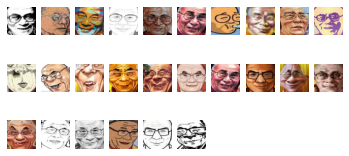

In [11]:
# Face detection with MTCNN

# Extracting face detection on 5 Celebrity Faces Dataset. Example of how MTCNN performs
from os import listdir
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
 
# Extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# specify folder to plot
folder = '5-celebrity-faces-dataset/traincaricatura/DalaiLama/' 
i = 1
print(listdir(folder))
# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape,filename)
    # plot
    pyplot.subplot(4, 10, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

# MTCNN: Extracting and loading Train and validation images

In [9]:
# Face detection for the 5 Celebrity Faces Dataset and load of the train and validation datasets 
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# Extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
    return faces
 
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)
 
# load train dataset
trainX, trainy = load_dataset('5-celebrity-faces-dataset/traincaricatura/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('5-celebrity-faces-dataset/val1picturecaricatura/')
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)


>loaded 42 examples for class: Beyonce
>loaded 26 examples for class: DalaiLama
>loaded 34 examples for class: JFK
>loaded 35 examples for class: JayZ
>loaded 40 examples for class: Obama
(177, 160, 160, 3) (177,)
>loaded 1 examples for class: Beyonce
>loaded 1 examples for class: DalaiLama
>loaded 1 examples for class: JFK
>loaded 1 examples for class: JayZ
>loaded 1 examples for class: Obama


## MTCNN: Plotting faces from Validation folder

1 (160, 160, 3)


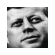

In [10]:
# Verifying face detection in the validation folder

folder = '5-celebrity-faces-dataset/val1picturecaricatura/JFK/'
i = 1
# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    pyplot.subplot(3, 7, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

# 2.- Facenet: It is created the faces embeddings, loading the facenet model and created a compressed folder saving the embeddings to be used in the classification process

In [11]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
# Get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]
 
# load the face dataset
data = load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('facenet_keras.h5')
print('Loaded Model')
# summarize input and output shape
print(model.inputs)
print(model.outputs)
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (177, 160, 160, 3) (177,) (5, 160, 160, 3) (5,)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
[<tf.Tensor 'input_1_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]
(177, 128)
(5, 128)


# 3.- Classifiers

# Classifiers: First it is checked the performance of one model starting with SVC. We will select for all the model a random selection of the pictures

In [12]:
# Loading all the libraries to use
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

##Linear Support Vectorial Classifier & Random face selection 

Predicted SVC: JFK (98.880)
Expected: JFK


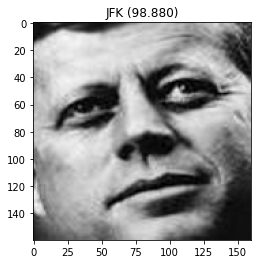

In [13]:
# develop a SVC classifier for the 5 Celebrity Faces Dataset

# load faces
data = load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted SVC: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot picture
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()



# Classifiers: Running the sample on several Machine Learning models:


*   SVC
*   Logistic regression
*   Random Forest
*   KNN





Predicted_SVC: JFK (98.809)
Expected_SVC: JFK
Predicted_LR: JFK (79.246)
Expected_LR: JFK
Predicted_RF: JFK (100.000)
Expected_RF: JFK
Predicted_KNN: JFK (100.000)
Expected_KNN: JFK


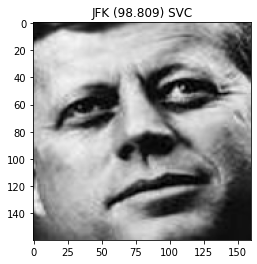

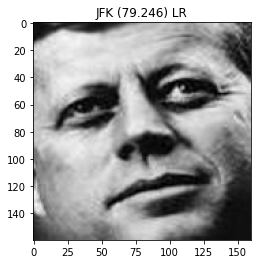

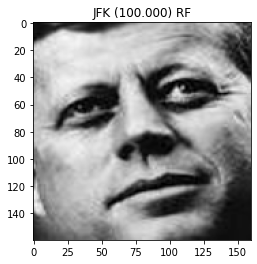

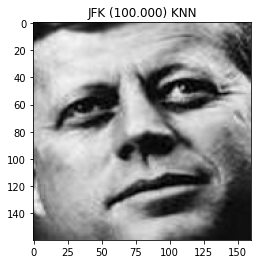

In [14]:
# Develop several classifier for the 5 Celebrity Faces Dataset

# fit model SVC
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# fit model Logistic Regression
model1 = LogisticRegression(solver='liblinear')
model1.fit(trainX, trainy)

# fit model RandomForest
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(trainX, trainy)

# fit model KNN
model3 = KNeighborsClassifier(2)
model3.fit(trainX, trainy)

# prediction for the face SVC
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# prediction for the face Logistic Regression
yhat_class1 = model1.predict(samples)
yhat_prob1 = model1.predict_proba(samples)

# prediction for the face RandomForest
yhat_class2 = model2.predict(samples)
yhat_prob2 = model2.predict_proba(samples)

# prediction for the face KNN
yhat_class3 = model3.predict(samples)
yhat_prob3 = model3.predict_proba(samples)

# get name SVC
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted_SVC: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected_SVC: %s' % random_face_name[0])
from sklearn.metrics import accuracy_score

# get name LR
class_index1 = yhat_class1[0]
class_probability1 = yhat_prob1[0,class_index1] * 100
predict_names1 = out_encoder.inverse_transform(yhat_class1)
print('Predicted_LR: %s (%.3f)' % (predict_names1[0], class_probability1))
print('Expected_LR: %s' % random_face_name[0])

# get name RF
class_index2 = yhat_class2[0]
class_probability2 = yhat_prob2[0,class_index2] * 100
predict_names2 = out_encoder.inverse_transform(yhat_class2)
print('Predicted_RF: %s (%.3f)' % (predict_names2[0], class_probability2))
print('Expected_RF: %s' % random_face_name[0])

# get name KNN
class_index3 = yhat_class3[0]
class_probability3 = yhat_prob3[0,class_index3] * 100
predict_names3 = out_encoder.inverse_transform(yhat_class3)
print('Predicted_KNN: %s (%.3f)' % (predict_names3[0], class_probability3))
print('Expected_KNN: %s' % random_face_name[0])

# plot for fun SVC
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) SVC' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

# plot for fun LR
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) LR' % (predict_names1[0], class_probability1)
pyplot.title(title)
pyplot.show()

# plot for fun LR
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) RF' % (predict_names2[0], class_probability2)
pyplot.title(title)
pyplot.show()

# plot for fun KNN
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) KNN' % (predict_names3[0], class_probability3)
pyplot.title(title)
pyplot.show()

## Classifier: Stacking Model. It is built the stacking model base of several level 0 models selected comparing accuracy scores means and deviations in the a boxplot graph

>lr 0.930 (0.048)
>knn 0.936 (0.052)
>cart 0.692 (0.120)
>svm 0.936 (0.056)
>bayes 0.938 (0.049)
>stacking 0.932 (0.057)


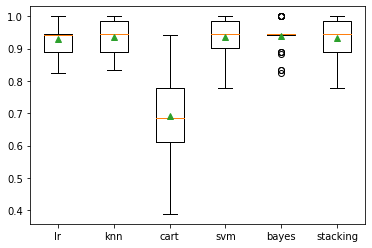

In [15]:
# Compare standalone models for binary classification

# get a stacking ensemble of models

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model4 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, trainX, trainy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model4 in models.items():
    scores = evaluate_model(model4)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Classifier: Stacking model is used to make a prediction on the same random face selected and see the performance obtained comparing it with the individual models

(1, 128)
Predicted_Stacker: JFK (98.680)
Expected_Stacker: JFK


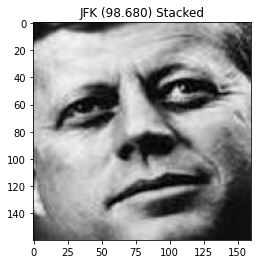

[[0.00555778 0.00471535 0.986802   0.0016959  0.00122897]]


In [16]:
#Prediction using the stacking model

# fit the model on all available data
model4.fit(trainX, trainy)

# prediction for the face Stacked
#samples = expand_dims(random_face_emb, axis=0)
yhat_class4 = model4.predict(samples)
yhat_prob4 = model4.predict_proba(samples)

print(samples.shape)

# Get name Stacker
class_index4 = yhat_class4[0]
class_probability4 = yhat_prob4[0,class_index4] * 100
predict_names4 = out_encoder.inverse_transform(yhat_class4)
print('Predicted_Stacker: %s (%.3f)' % (predict_names4[0], class_probability4))
print('Expected_Stacker: %s' % random_face_name[0])

# Plot Stacked result
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) Stacked' % (predict_names4[0], class_probability4)
pyplot.title(title)
pyplot.show()
print(yhat_prob4)


## Classifier: Create the Super Learner stacked

In [17]:
pip install mlens

     |████████████████████████████████| 235kB 5.9MB/s 


## Classifier: Superlearner stacker Step by step

In [19]:
# example of a super learner model for binary classification
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
 
# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 
# fit a meta model
def fit_meta_model(X, y):
	model = LogisticRegression(solver='liblinear')
	model.fit(X, y)
	return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))
 
# make predictions with Super Learner stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return (meta_model.predict(meta_X), meta_model.predict_proba(meta_X))
 
print('Train', trainX.shape, trainy.shape, 'Test', testX.shape, testy.shape)
print('TestX dataset', testX.shape)
print('Testy dataset',testy.shape)
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(trainX, trainy, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(trainX, trainy, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

# evaluate base models
print ('---Training---')
evaluate_models(trainX, trainy, models)
print ('---Validation---')
evaluate_models(testX, testy, models)

# evaluate meta model
sup_lear_pred_array_md = super_learner_predictions(testX, models, meta_model)
yhat_class5_md = sup_lear_pred_array_md[0]
yhat_prob5_md = sup_lear_pred_array_md[1]
print('Super Learner: %.3f' % (accuracy_score(testy, yhat_class5_md) * 100))
#print(yhat_prob5_md[:, 1])
print(yhat_class5_md)


Train (177, 128) (177,) Test (5, 128) (5,)
TestX dataset (5, 128)
Testy dataset (5,)
Meta  (177, 45) (177,)
---Training---
LogisticRegression: 96.610
DecisionTreeClassifier: 100.000
SVC: 99.435
GaussianNB: 96.045
KNeighborsClassifier: 97.175
AdaBoostClassifier: 74.011
BaggingClassifier: 100.000
RandomForestClassifier: 99.435
ExtraTreesClassifier: 100.000
---Validation---
LogisticRegression: 100.000
DecisionTreeClassifier: 100.000
SVC: 100.000
GaussianNB: 100.000
KNeighborsClassifier: 100.000
AdaBoostClassifier: 80.000
BaggingClassifier: 100.000
RandomForestClassifier: 100.000
ExtraTreesClassifier: 100.000
Super Learner: 100.000
[0 1 2 3 4]


[2]
Super Learner: JFK (94.018)
Super Learner: JFK


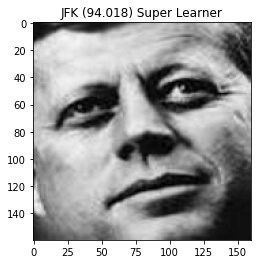

In [20]:
#Superlearner prediction
sup_lear_pred_array = super_learner_predictions(samples,models, meta_model)
yhat_class5 = sup_lear_pred_array[0]
yhat_prob5 = sup_lear_pred_array[1]
print (sup_lear_pred_array[0])
# Get name Super Learner
class_index5 = yhat_class5[0]
class_probability5 = yhat_prob5[0,class_index5] * 100
predict_names5 = out_encoder.inverse_transform(yhat_class5)
print('Super Learner: %s (%.3f)' % (predict_names5[0], class_probability5))
print('Super Learner: %s' % random_face_name[0])

# Plot Stacked result
pyplot.imshow(random_face_pixels)
title = '%s (%.3f) Super Learner' % (predict_names5[0], class_probability5)
pyplot.title(title)
pyplot.show()